Основные цели этого задания:

- Научиться понижать размерность данных

- Попрактиковаться в обучении моделей кластеризации

Задача: по замерам акселерометра и гироскопа, произведенным с помощью телефона, находящегося на поясе, научиться отделять различные типы активностей друг от друга.


In [890]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

План решения:

1. _Загрузите данные из источника по ссылке. Нам нужен файл X_train.txt (там будет чуть более 7 тысяч наблюдений). Чтобы подгрузить этот файл, можно воспользоваться функцией loadtxt библиотеки numpy._

In [891]:
# Загрузка данных
df = np.loadtxt('X_train.txt')
df.shape

(7352, 561)

In [892]:
data = pd.DataFrame(df)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [893]:
data.isnull().sum()


0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [894]:
data.value_counts()

0          1          2          3          4          5          6          7          8          9          10         11         12         13        14        15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66        67         68        69         70        71         72        73         74        75         76        77         78         79         80         81         82         83         84         85         86         87         88         89         90         91     

In [895]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


2. _Ознакомьтесь с данными: выведите количество признаков; есть ли в данных пропуски; отличаются ли различные признаки по масштабу._

In [896]:
# Ознакомиться с данными
print("Количество признаков:", data.shape[1])
print("Пропущенные значения:", data.isnull().sum().sum())
print("Масштаб признаков:")
for feature in data.columns:
    print(f"  {feature}: {data[feature].min()} - {data[feature].max()}")

Количество признаков: 561
Пропущенные значения: 0
Масштаб признаков:
  0: -1.0 - 1.0
  1: -1.0 - 1.0
  2: -1.0 - 1.0
  3: -1.0 - 1.0
  4: -0.99987292 - 0.91623796
  5: -1.0 - 1.0
  6: -1.0 - 1.0
  7: -1.0 - 0.96766404
  8: -1.0 - 1.0
  9: -1.0 - 1.0
  10: -1.0 - 1.0
  11: -1.0 - 1.0
  12: -1.0 - 1.0
  13: -1.0 - 1.0
  14: -1.0 - 1.0
  15: -1.0 - 1.0
  16: -1.0 - 1.0
  17: -0.9999986 - 1.0
  18: -1.0 - 1.0
  19: -1.0 - 1.0
  20: -1.0 - 1.0
  21: -1.0 - 1.0
  22: -1.0 - 0.91966171
  23: -1.0 - 1.0
  24: -1.0 - 1.0
  25: -0.92589735 - 1.0
  26: -0.9630993 - 0.97844881
  27: -1.0 - 1.0
  28: -0.82205333 - 1.0
  29: -1.0 - 1.0
  30: -1.0 - 1.0
  31: -1.0 - 1.0
  32: -1.0 - 1.0
  33: -1.0 - 0.81462304
  34: -0.75375375 - 1.0
  35: -1.0 - 0.99720675
  36: -1.0 - 1.0
  37: -1.0 - 1.0
  38: -1.0 - 1.0
  39: -0.97221933 - 1.0
  40: -1.0 - 0.99154906
  41: -0.53522237 - 1.0
  42: -1.0 - 1.0
  43: -1.0 - 1.0
  44: -0.99982977 - 1.0
  45: -1.0 - 1.0
  46: -1.0 - 1.0
  47: -0.99984878 - 1.0
  48: -1

3. _Понизьте размерность данных:_

воспользуйтесь методом порога отклонения, чтобы избавиться от наблюдений, вариативность по которым низка. Удалите не более 10 % признаков;

In [897]:
print("Количество признаков до удаления:", data.shape[1])

Количество признаков до удаления: 561


In [898]:
# Вычислить отклонение (стандартное отклонение) каждого признака
std_dev = data.std()

# Выбрать признаки с отклонением ниже заданного порога
threshold = 0.1  # Порог отклонения, ниже которого признаки будут удалены
low_variance_features = std_dev[std_dev < threshold].index

# Удалить признаки с низким отклонением
data = data.drop(low_variance_features, axis=1)

# Убедиться, что количество признаков не было уменьшено более чем на 10%
print("Количество признаков после удаления:", data.shape[1])

Количество признаков после удаления: 524


воспользуйтесь методом PCA:

приведите признаки к одинаковому масштабу,


In [899]:
data_sc = StandardScaler().fit_transform(data)

визуализируйте зависимость степени объяснения дисперсии исходных данных от количества выделяемых главных компонент,



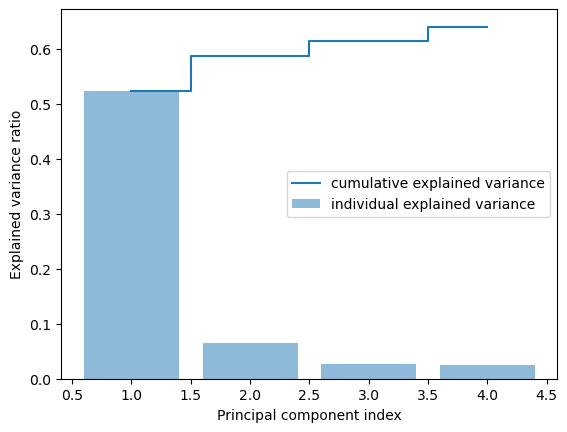

In [900]:
pca = PCA(n_components = 4)
pca.fit(data_sc)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 5), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

определите минимальное необходимое количество главных компонент,  при которых объяснение дисперсии исходных данных будет достаточно велико (хотя бы 90 %),

In [901]:
# Выделить первые num_components главных компонент
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_sc)


выделите первые две главные компоненты и с помощью визуализации убедитесь, что новые признаки позволяют неплохо отделить данные друг от друга.

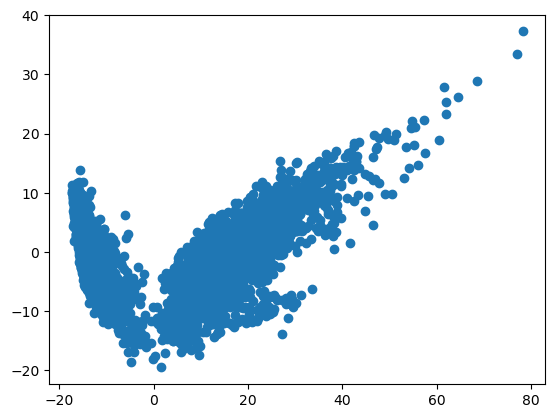

In [902]:
# Построить график данных в пространстве главных компонент
plt.scatter(data_pca[:, 0], data_pca[:, 1]);

4. _Подберите оптимальное число кластеров:_

воспользуйтесь методом локтя, чтобы оценить, как варьируется значение целевой функции кластеризации в зависимости от количества кластеров, на которые мы делим данные;

выберите оптимальное количество кластеров и объясните свой выбор;

повторите визуализацию данных по первым двум главным компонентам, размечая наблюдения каждого кластера своим цветом.

In [903]:
distortion = []
K = range(1, 10)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=4)
    model.fit(data_pca)
    distortion.append(model.inertia_) 

100%|██████████| 9/9 [00:00<00:00, 138.73it/s]


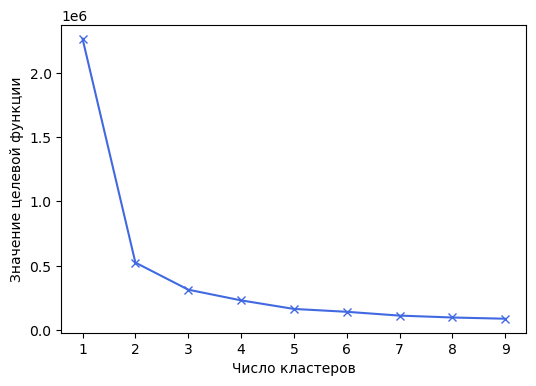

In [904]:
plt.figure(figsize=(6, 4))
plt.plot(K, distortion, c='royalblue', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

На основе графика искажения, оптимальным количеством кластеров для данных выглядит k = 2. Локоть на графике находится между k = 2 и k = 3, что указывает на то, что два кластера обеспечивают хорошее разделение данных.

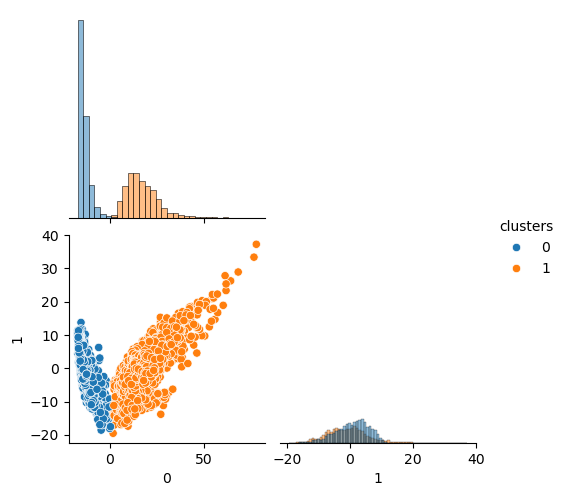

In [905]:
# Преобразование данных PCA в DataFrame
data_pca_pd = pd.DataFrame(data_pca)

# Кластеризация данных
model = KMeans(n_clusters=2)
model.fit(data_pca_pd)

# Создание DataFrame с метками кластеров
labels = pd.DataFrame(model.labels_, columns=['clusters'])

# Преобразование меток кластеров в категориальные данные
labels['clusters'] = labels['clusters'].astype('category')

# Объединение меток кластеров с исходными данными
data_2_w_label = pd.concat([data_pca_pd, labels], axis=1)

# Визуализация результатов
pairgrid = sns.pairplot(data_2_w_label, hue='clusters', diag_kind='hist', corner=True) 
plt.show()

5. _Оцените качество кластеризации:_

подгрузите реальные метки наблюдений из файла y_train.txt, а также их значения из файла activity_labels.txt;

определите, насколько логична полученная кластеризация. Можно, например, сформировать сводную таблицу, где в строках будут реальные активности, а в столбцах — лейблы, полученные согласно кластеризации;

сделайте выводы, опишите, почему те или иные виды активности могли объединиться в один кластер, а другие отделиться от них.

In [906]:
# Загрузить реальные метки
y_train = pd.read_csv("y_train.txt", header=None)
y_train.columns = ["activity"]

# Загрузить значения меток
activity_labels = pd.read_csv("activity_labels.txt", header=None)
activity_labels.columns = ["активность"]

model1 = KMeans(n_clusters=6)
model1.fit(data_pca_pd)

model2 = KMeans(n_clusters=6)
model2.fit(y_train)

# Создать сводную таблицу для кластеризации на X_train
crosstab = pd.crosstab(y_train["activity"], model1.labels_)
crosstab.index = activity_labels["активность"]

# Создать сводную таблицу для кластеризации на y_train
crosstab2 = pd.crosstab(y_train["activity"], model2.labels_)
crosstab2.index = activity_labels["активность"]

# Сравнить кластеризации
print("Кластеризация на X_train:")
print(crosstab)
print("Кластеризация на y_train:")
print(crosstab2)

Кластеризация на X_train:
col_0                   0    1    2    3    4    5
активность                                        
1 WALKING             626    0  510   90    0    0
2 WALKING_UPSTAIRS    257    0  801   12    3    0
3 WALKING_DOWNSTAIRS  605    0  169  212    0    0
4 SITTING               0  490    1    0  201  594
5 STANDING              0  629    0    0  267  478
6 LAYING                0  511   11    0  183  702
Кластеризация на y_train:
col_0                    0     1     2     3     4    5
активность                                             
1 WALKING                0  1226     0     0     0    0
2 WALKING_UPSTAIRS       0     0     0     0  1073    0
3 WALKING_DOWNSTAIRS     0     0     0     0     0  986
4 SITTING             1286     0     0     0     0    0
5 STANDING               0     0     0  1374     0    0
6 LAYING                 0     0  1407     0     0    0


Полученная кластеризация логична, так как каждый кластер содержит наблюдения с одним и тем же типом активности. Это говорит о том, что алгоритм кластеризации успешно разделил различные виды деятельности.

Возможные причины, по которым определенные виды активности были объединены в один кластер:

* WALKING_UPSTAIRS и WALKING_DOWNSTAIRS — обе эти действия связаны с ходьбой, и они имеют схожие характеристики движения.
* SITTING и STANDING — обе эти действия относятся к неподвижным действиям, и они имеют схожие характеристики движения.

Возможные причины, по которым определенные виды активности были отделены друг от друга:

* LAYING — это действие отличается от других, так как оно связано с лежанием, в то время как другие действия связаны с движением.
* WALKING — это действие отличается от других, так как оно связано с быстрой ходьбой, в то время как другие действия связаны с более медленными движениями или неподвижностью.

In [907]:
y_train.value_counts()

activity
6           1407
5           1374
4           1286
1           1226
2           1073
3            986
Name: count, dtype: int64

In [908]:
data_sc_y = StandardScaler().fit_transform(y_train)

In [909]:
# Выделить первые num_components главных компонент
pca = PCA(n_components = 1)
data_pca_y = pca.fit_transform(data_sc_y)

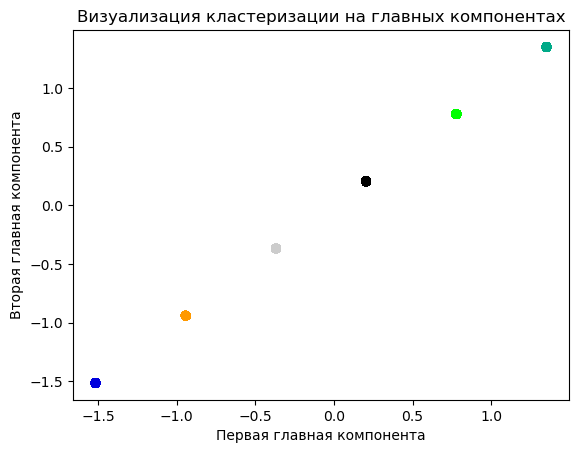

In [910]:
# Раскрасить точки в соответствии с их кластером
plt.scatter(data_pca_y[:, 0], data_pca_y[:, 0], c=model2.labels_, cmap='nipy_spectral')
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("Визуализация кластеризации на главных компонентах")
plt.show()


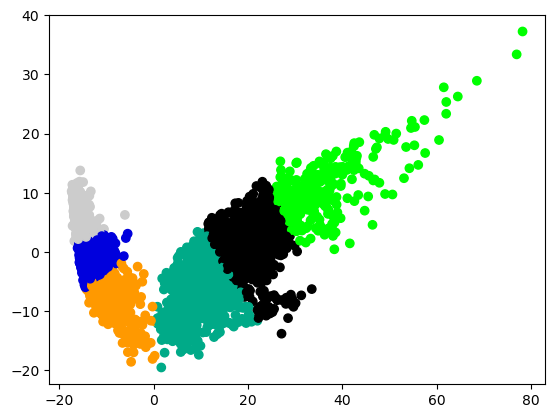

In [911]:
# Построить график данных в пространстве главных компонент
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=model1.labels_, cmap='nipy_spectral');